In [41]:
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.preprocessing import StandardScaler

In [ ]:
from src.data import make_dataset

# import clustering data

In [19]:
dtype = {'fips': str}

In [20]:
df = pd.read_csv('../data/raw/tmp_ds_cluster.csv.gz', dtype=dtype)

In [98]:
df.head()

,id,fips,random,OwnerOccupiedInt,YearBuilt,SquareFootage,LotSize,EstimatedValue,TaxAssessedValue,TaxImprovementValue,TaxLandValue,TaxImprovementPercent,TaxAmount
0,186523711,01073,0.000003,0,1900,1200,11620.0,50000,5200,0,0,0,377
1,149312683,01073,0.000030,1,1998,2288,0.0,302000,59440,0,0,0,3691
2,190417232,01073,0.000053,0,1949,978,7200.0,39000,8240,0,0,0,597
3,194862634,01073,0.001009,1,2007,1125,0.0,120000,12600,0,0,0,578
4,195182082,01073,0.001124,0,1952,1056,7200.0,45000,10020,0,0,0,826


In [106]:
df.describe().transpose().round(1)

,count,mean,std,min,25%,50%,75%,max
id,267661.0,89585295.0,79651465.9,21944.0,20734904.0,45924294.0,161552172.0,253263704.0
random,267661.0,0.1,0.1,0.0,0.0,0.1,0.1,0.2
OwnerOccupiedInt,267661.0,0.8,0.4,0.0,1.0,1.0,1.0,1.0
YearBuilt,267661.0,1890.9,412.9,0.0,1959.0,1985.0,2001.0,2016.0
SquareFootage,267661.0,1797.0,866.3,0.0,1257.0,1665.0,2238.0,36096.0
LotSize,267661.0,25118.6,1251021.7,0.0,5663.0,7962.0,12350.0,443179440.0
EstimatedValue,267661.0,298065.5,188681.5,0.0,169000.0,258000.0,383000.0,2961000.0
TaxAssessedValue,267661.0,182407.9,183883.4,0.0,39600.0,134190.0,259700.0,15155262.0
TaxImprovementValue,267661.0,97232.0,116110.7,0.0,7590.0,54684.0,153700.0,6604388.0
TaxLandValue,267661.0,52179.4,97439.9,0.0,2388.0,16800.0,62500.0,13336812.0


In [22]:
df_01073 = df.loc[df['fips']=='01073']

In [23]:
print len(df)
print len(df_01073)

267661
2633


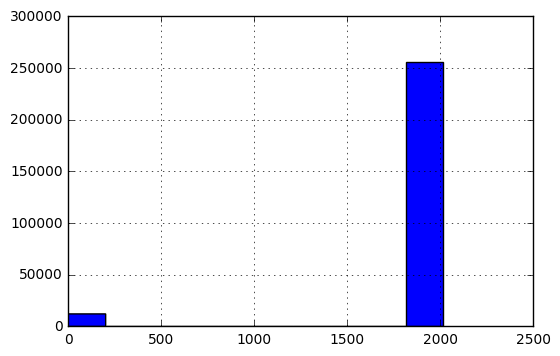

In [63]:
df['YearBuilt'].hist()

In [65]:
pipeline_yb = Pipeline([
    ('year_built', YearBuiltExtractor())
])

In [94]:
X = pipeline_yb.fit_transform(df)
X_01073 = pipeline_yb.fit_transform(df_01073)

# ALL data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121334390>]], dtype=object)

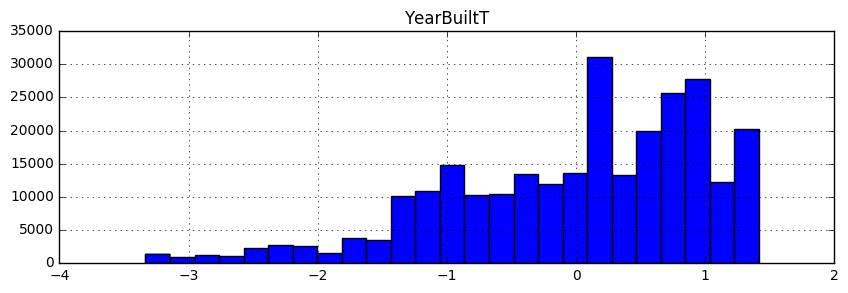

In [96]:
df_t = pd.DataFrame(X, columns=['YearBuiltT'])
df_t.hist(bins=25, figsize=(10,3))

# FIPS 01073

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12038dd10>]], dtype=object)

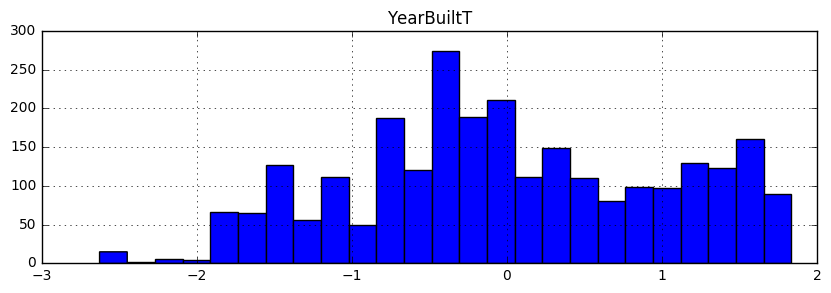

In [97]:
df_t_01073 = pd.DataFrame(X_01073, columns=['YearBuiltT'])
df_t_01073.hist(bins=25, figsize=(10,3))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113362910>]], dtype=object)

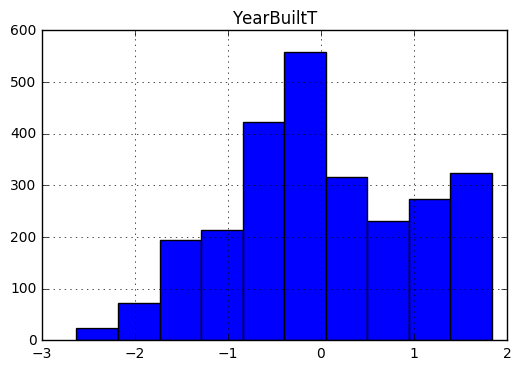

In [68]:
pipeline_yb = Pipeline([
    ('year_built', YearBuiltExtractor()),
    ('scaler', StandardScaler())
])

X = pipeline_yb.fit_transform(df_01073)

pd.DataFrame(X, columns=['YearBuiltT']).hist()